In [46]:
import fastai
from fastai.vision.widgets import *
import matplotlib
import numpy


In [47]:
print(fastai.__version__)
import torch

2.7.11


In [48]:
from fastbook import *

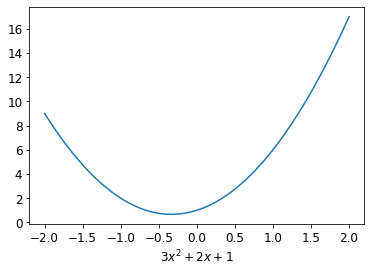

In [49]:
def f(x): return 3*x**2 + 2*x +1
plot_function(f,"$3x^2 + 2x + 1$")

In [50]:
def quad(a,b,c,x): return a*x**2 + b*x +c 

In [51]:
quad(3,2,1,1.5)

10.75

In [52]:
from functools import partial #to fix some of the constants like a,b,c
def mk_quad(a,b,c):return partial(quad,a,b,c)# u wanna pass in the function and values u want to fix in this case a,b,c

In [53]:
f = mk_quad(3,2,1)

In [54]:
f(1.5)

10.75

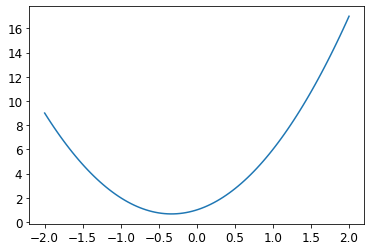

In [55]:
plot_function(f)

In [56]:
from numpy.random import normal,seed,uniform
np.random.seed(42)
def noise(x,scale): return normal(scale=scale,size=x.shape)
def add_noise(x,mult,add):return x*(1+noise(x,mult))+noise(x,add)#to add noise into the above function

In [57]:
x= torch.linspace(-2,2,steps=20)[:,None]#creates a tensor that goes from -2 to 2 with 20 dots  [:,None] is converting it to a 2d tensor
y= add_noise(f(x),0.3,1.5)

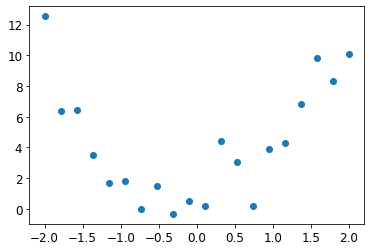

In [58]:
plt.scatter(x,y);

In [62]:
from ipywidgets import interact
@interact(a=1.5,b=1.5,c=1.5)
def plot_quad(a,b,c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c))
    plt.ylim(-3,12)
    plt.show()

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [65]:
def mse(preds,acts):return ((preds-acts)**2).mean()

In [67]:
@interact(a=1.5,b=1.5,c=1.5)
def plot_quad(a,b,c):
    f=mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mse(f(x),y)
    plt.ylim=(-3,12)
    plot_function(f,title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [68]:
def quad_mse(params):
    f=mk_quad(*params)#passes in abc....
    return mse(f(x),y)

In [69]:
quad_mse([1.5,1.5,1.5])

tensor(5.8336, dtype=torch.float64)

In [70]:
abc = torch.tensor([1.5,1.5,1.5])
abc.requires_grad_() #keeps track of them to use it in back propogation

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [71]:
loss =quad_mse(abc)
loss

tensor(5.8336, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [73]:
loss.backward()

In [75]:
abc.grad #this tells that if you increase a loss will go down and if u decrease b loss will go up and so on

tensor([-5.1419,  2.8472, -1.1009])

In [76]:
bcd = torch.tensor([2.0,1.5,1.5])
abc.requires_grad_()
loss=quad_mse(bcd)

In [77]:
loss #you can see that we have increased a and loss has decreased from 5.8 to 4.2

tensor(4.2367, dtype=torch.float64)

In [78]:
#gradient  descent one step
with torch.no_grad():
    abc-=abc.grad*0.01 #learning rate
    loss= quad_mse(abc)
print(f'loss={loss:.2f}')

loss=5.49


In [79]:
#5 steps of gradient descent
for i in range(5):
    loss=quad_mse(abc)
    loss.backward()
    with torch.no_grad():abc-=abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=5.49
step=1; loss=4.90
step=2; loss=4.23
step=3; loss=3.67
step=4; loss=3.33


In [80]:
abc

tensor([2.3077, 0.9588, 1.6227], requires_grad=True)

In [81]:
#its highly unlikely that the relation between parameters and whether a pixel is part of a basket hound or not is not definitely quadratic

In [82]:
def rectified_linear(m,b,x):
    y=m*x+b
    return torch.clip(y,0.) #torch.clip(y,x)if y is less than x then it turns into that x here if y is less than 0 then it will be converted into 0

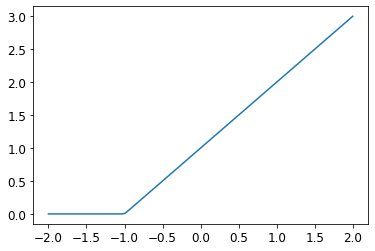

In [84]:
plot_function(partial(rectified_linear,1,1))

In [85]:
@interact(m=1.5,b=1.5)
def plot_relu(m,b):
    plot_function(partial(rectified_linear,m,b))
    plt.ylim=(-1,4)

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [87]:
#we can combine many relus to make any function we want 
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2))
    plt.ylim=(-1,6)

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

In [ ]:
#start with resnet18 or maybe resnet34 that is nearly as fast